# Nearest Neighbor

Nearest Neighbor is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). It is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.



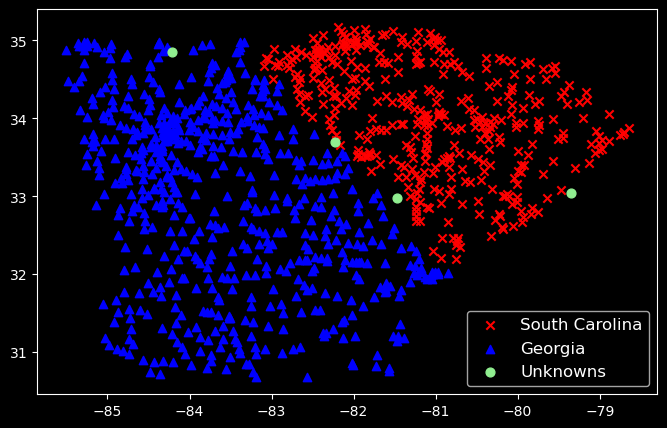

In [13]:
# import libraries
from matplotlib import pyplot as plt 
import pandas as pd

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(8, 5))

url  = 'https://raw.githubusercontent.com/fahadsultan/csc343/refs/heads/main/data/uscities.csv'
data = pd.read_csv(url)
us_mainland = data[(data['state_id'] != 'HI') & \
                   (data['state_id'] != 'AK') & \
                   (data['state_id'] != 'PR')]

sc = us_mainland[us_mainland['state_id'] == 'SC']
ga = us_mainland[us_mainland['state_id'] == 'GA']

unknown1 = (33.04366363086289, -79.34728514760124)
unknown2 = (33.69266640894652, -82.22939618795743)
unknown3 = (32.9806084015696,  -81.46763167425789)
unknown4 = (34.84821943641973, -84.2073074091929)

ax.scatter(sc['lng'], sc['lat'], label='South Carolina', color='red',  marker='x');
ax.scatter(ga['lng'], ga['lat'], label='Georgia',        color='blue', marker='^');
ax.scatter(unknown1[1], unknown1[0], s=40, label='Unknowns', color='lightgreen');
ax.scatter(unknown2[1], unknown2[0], s=40, color='lightgreen');
ax.scatter(unknown3[1], unknown3[0], s=40, color='lightgreen');
ax.scatter(unknown4[1], unknown4[0], s=40, color='lightgreen');
ax.legend(fontsize=12);

The algorithm is composed of two stages:

1. Training stage: The algorithm stores all the training data.

2. Testing stage: The algorithm compares the test data with the training data and returns the most similar data.

The algorithm is based on the assumption that the data points that are close to each other are similar. The similarity is calculated using a distance function, such as Euclidean distance, Manhattan distance, Minkowski distance, etc.

The algorithm is simple and easy to implement, but it is computationally expensive, especially when the training data is large. It is also sensitive to the curse of dimensionality, which means that the algorithm's performance deteriorates as the number of dimensions increases.


## Pseudocode

The pseudocode for the nearest neighbor algorithm is as follows:


* For each test data point:
    1. Calculate the distance between the test data point and all training data points.
    2. Sort the distances in ascending order.
    3. Select the nearest data points.
    4. Determine the class of the nearest data points.
    5. Assign the test data point to the nearest neighbor class.



## k-NN Algorithm

The k-NN algorithm is an extension of the nearest neighbor algorithm. Instead of returning the most similar data point, the algorithm returns the k most similar data points. The class of the test data is determined by the majority class of the k most similar data points.

For example, in the figure below, the test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

<br/>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1920px-KnnClassification.svg.png" width="40%" style="filter:invert(1)"></center>
<br/>

The k-NN algorithm is more robust than the nearest neighbor algorithm, as it reduces the noise in the data. However, it is computationally more expensive, as it requires storing and comparing more data points.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif" width="100%" style="filter:invert(1)">
</center>

The k-NN algorithm is a simple and effective algorithm for classification and regression tasks. It is widely used in various fields, such as pattern recognition, image processing, and data mining.


## k-NN Classication 

Here is an example of how to implement the k-NN algorithm for classification in Python using the popular library `scikit-learn`:


In this example, we load the Iris dataset, split it into training and testing sets, create a k-NN classifier with k=3, fit the classifier to the training data, make predictions on the test data, and calculate the accuracy of the classifier.

In [6]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


## K-NN Regression

The k-NN algorithm can also be used for regression tasks. In k-NN regression, the output is the average of the k nearest neighbors' values. The steps are similar to the k-NN classification algorithm, but instead of determining the class, the algorithm calculates the average value of the k nearest neighbors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors

rng = np.random.RandomState(0)
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X_train).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

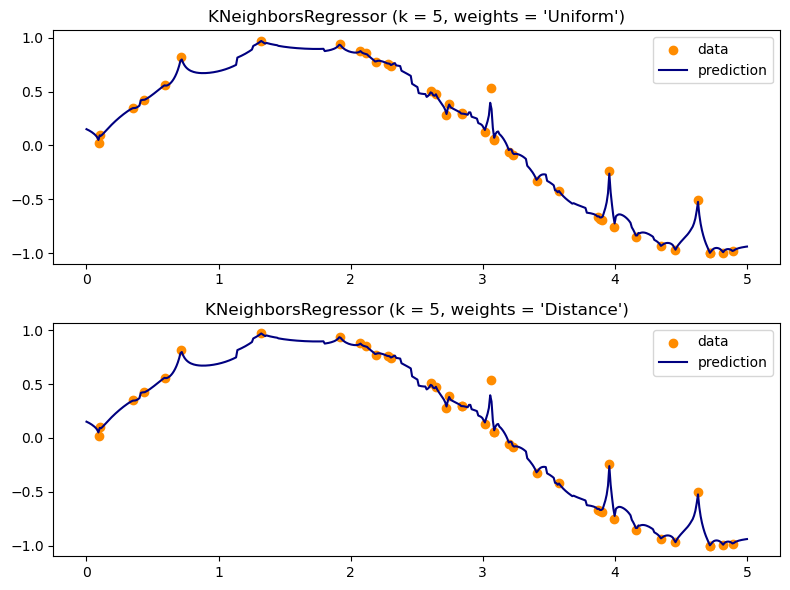

In [5]:
n_neighbors = 5

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

knn_uniform = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
knn_distance = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    
y_hat_uniform = knn.fit(X_train, y).predict(X_test)
y_hat_distance = knn.fit(X_train, y).predict(X_test)

axs[0].scatter(X_train, y, color="darkorange", label="data")
axs[0].plot(X_test, y_hat_uniform, color="navy", label="prediction")
axs[0].axis("tight")
axs[0].legend()
axs[0].set_title("KNeighborsRegressor (k = %i, weights = 'Uniform')" % (n_neighbors))


axs[1].scatter(X_train, y, color="darkorange", label="data")
axs[1].plot(X_test, y_hat_distance, color="navy", label="prediction")
axs[1].axis("tight")
axs[1].legend()
axs[1].set_title("KNeighborsRegressor (k = %i, weights = 'Distance')" % (n_neighbors))

plt.tight_layout()
plt.show()

## Cosine Similarity


<img src="https://www.researchgate.net/publication/322821813/figure/fig2/AS:960500837937160@1606012653134/Difference-between-Euclidean-distance-and-cosine-distance_Q320.jpg" width="35%" style="filter:invert(1)" align="right">

While Euclidean distance is the most commonly used distance metric in nearest neighbor algorithms, there are several alternative measures of similarity that can be used depending on the nature of the data and the specific application. 

Cosine similarity measures the cosine of the angle between two non-zero vectors in an inner product space. It is particularly useful for high-dimensional data, such as text data represented as BOW vectors, where the magnitude of the vectors may not be as important as their direction.

The formula for cosine similarity between two vectors A and B is:
$$
\text{Cosine Similarity} = \frac{A \cdot B}{||A|| \times ||B||}
$$
where $A \cdot B$ is the dot product of the vectors defined as $A \cdot B = \sum_{i=1}^{n} A_i B_i$, 

and $||A||$ and $||B||$ are the magnitudes of the vectors, calculated as $||A|| = \sqrt{\sum_{i=1}^{n} A_i^2}$ and $||B|| = \sqrt{\sum_{i=1}^{n} B_i^2}$.

Use 1 - Cosine Similarity to convert it into a distance metric if needed.

Cosine similarity ranges from -1 to 1, where 1 indicates that the vectors are identical, 0 indicates orthogonality (no similarity), and -1 indicates that the vectors are diametrically opposed.

<img src="https://storage.googleapis.com/lds-media/images/cosine-similarity-vectors.width-745.jpg" width="100%" style="filter:invert(1)">

As opposed to Euclidean distance, which is sensitive to the magnitude of the vectors, cosine similarity focuses on the orientation of the vectors, making it more suitable for certain applications like text analysis and recommendation systems.

In scikit-learn, you can use cosine similarity as a distance metric in k-NN as follows:

```python
knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
```

A classic toy example where cosine similarity works better than Euclidean distance is when magnitude doesn’t matter but direction does, especially in text or frequency/count vectors.

Imagine we have 3 short “documents” represented as word-count vectors in a 3-dimensional vocabulary:
`[“data”, “science”, “cat”]`

In [21]:
import pandas as pd 

bow = pd.DataFrame()
bow['data']     = [10, 1, 0]
bow['science']  = [10, 1, 0]
bow['cat']      = [0, 0, 1]
bow.index       = ['A', 'B', 'C']

bow

,data,science,cat
A,10,10,0
B,1,1,0
C,0,0,1


Euclidean distance considers magnitude — so A and B look nearly as far apart as A and C, even though semantically A and B are very similar (both about data science) while C is completely different (about cats):

In [22]:
def euclidean(row1, row2):
    return sum((row1 - row2) ** 2) ** 0.5

print("A and B", euclidean(bow.loc['A'], bow.loc['B']))
print("A and C", euclidean(bow.loc['A'], bow.loc['C']))

A and B 12.727922061357855
A and C 14.177446878757825


Cosine ignores magnitude and cares only about direction (pattern of word usage).

In [23]:
def cosine(row1, row2):
    dot_product = sum(row1 * row2)
    magnitude1  = sum(row1 ** 2) ** 0.5
    magnitude2  = sum(row2 ** 2) ** 0.5
    return dot_product / (magnitude1 * magnitude2)

print("A and B", cosine(bow.loc['A'], bow.loc['B']))
print("A and C", cosine(bow.loc['A'], bow.loc['C']))

A and B 0.9999999999999998
A and C 0.0



* cos(A, B) = 1.0

(They point in exactly the same direction: same ratios 10:10 and 1:1)

* cos(A, C) = 0

(They share no common words → orthogonal directions)

So cosine similarity says:

* A and B are identical
* A and C are completely unrelated

This matches the semantic intuition.